In [1]:
from lava.proc.lif.process import LIF
from lava.proc.dense.process import Dense
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Create processes
lif1 = LIF(shape=(3, ),                         # Number and topological layout of units in the process
           vth=10.,                             # Membrane threshold
           dv=0.1,                              # Inverse membrane time-constant
           du=0.1,                              # Inverse synaptic time-constant
           bias_mant=[1.1, 1.2, 1.3],           # Bias added to the membrane voltage in every timestep
           name="lif1")

dense = Dense(weights=np.random.rand(2, 3),     # Initial value of the weights, chosen randomly
              name='dense')

lif2 = LIF(shape=(2, ),                         # Number and topological layout of units in the process
           vth=10.,                             # Membrane threshold
           dv=0.1,                              # Inverse membrane time-constant
           du=0.1,                              # Inverse synaptic time-constant
           bias_mant=0.5,                        # Bias added to the membrane voltage in every timestep
           name='lif2')

In [3]:
for proc in [lif1, lif2, dense]:
    for port in proc.in_ports:
        print(f'Proc: {proc.name:<5}  Name: {port.name:<5}  Size: {port.size}')
    for port in proc.out_ports:
        print(f'Proc: {proc.name:<5}  Name: {port.name:<5}  Size: {port.size}')

Proc: lif1   Name: a_in   Size: 3
Proc: lif1   Name: s_out  Size: 3
Proc: lif2   Name: a_in   Size: 2
Proc: lif2   Name: s_out  Size: 2
Proc: dense  Name: s_in   Size: 3
Proc: dense  Name: a_out  Size: 2


In [4]:
lif1.s_out.connect(dense.s_in)
dense.a_out.connect(lif2.a_in)

Run +  Monitor

In [5]:
from lava.proc.monitor.process import Monitor

monitor_lif1 = Monitor()
monitor_lif2 = Monitor()

num_steps = 10

# Add Monitor to LIF Precesses
monitor_lif1.probe(lif1.v, num_steps)
monitor_lif2.probe(lif2.v, num_steps)

In [6]:
from lava.magma.core.run_conditions import RunSteps

run_condition = RunSteps(num_steps=num_steps)

In [7]:
from lava.magma.core.run_configs import Loihi1SimCfg

run_cfg = Loihi1SimCfg(select_tag="floating_pt")

In [8]:
lif2.run(condition=run_condition, run_cfg=run_cfg)

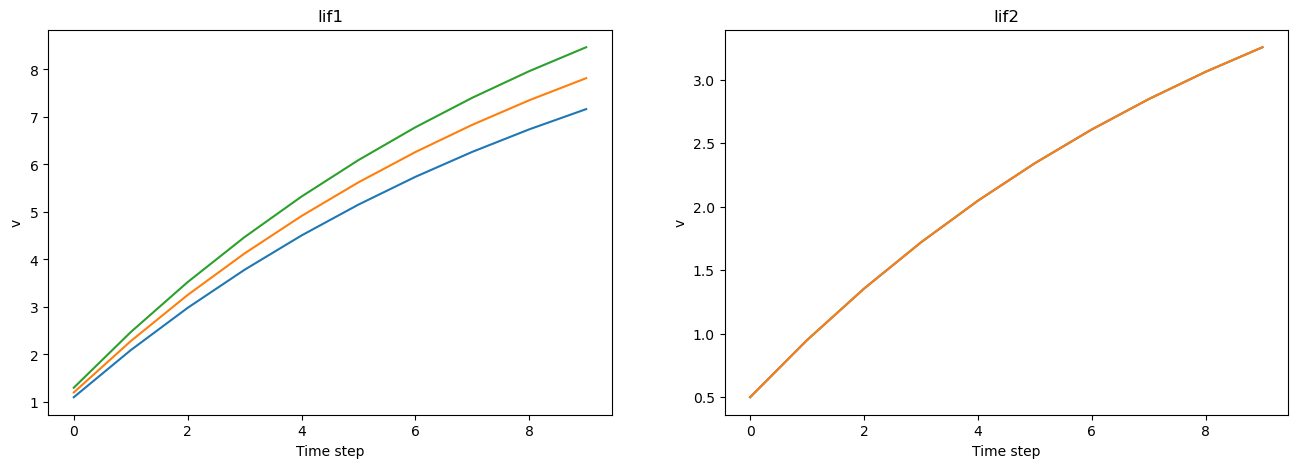

In [9]:
data_lif1 = monitor_lif1.get_data()
data_lif2 = monitor_lif2.get_data()

# Create a subplot for each monitor
fig = plt.figure(figsize=(16, 5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Plot the recorded data
monitor_lif1.plot(ax0, lif1.v)
monitor_lif2.plot(ax1, lif2.v)

In [10]:
lif2.stop()